## Bring in libraries and dataframes and set indexes

In [13]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta

Path = 'K:\CPDiary\Data\BaxtersMVI'

#Get Experiment index
Layout = pd.read_excel(Path + '\TrialLayout.xlsx',index_col='Plot')

#Set up index for Low Zone
LowWHCZoneIndex = pd.read_excel(Path + '\LoggedData\IndexFiles\BaxtersLowWHCZone.xlsx',
                                index_col=0)
LowWHCZoneIndex.ix[:,'Zone'] = [Layout.ix[x,'Zone'] for x in LowWHCZoneIndex.Plot]
LowWHCZoneIndex.ix[:,'Irrig'] = [Layout.ix[x,'Irrig'] for x in LowWHCZoneIndex.Plot]
LowWHCZoneIndex.ix[:,'Rep'] = [Layout.ix[x,'Rep'] for x in LowWHCZoneIndex.Plot]
LowWHCZoneIndex.drop(['Units','Summary','Plot'],axis=1,inplace=True)
#Get Data for Mid Zone
LowWHCZoneData=pd.read_csv(Path + '\LoggedData\BaxtersLowWHCZone.dat', 
                           skiprows = [0,2,3], index_col = 0,na_values=['NAN',' NAN'])
#join Data with index
LowWHCZoneDataTransposed = LowWHCZoneData.transpose()
LowWHCZoneMerged = pd.concat([LowWHCZoneIndex,LowWHCZoneDataTransposed],axis=1)
#Set up indexing and data frames
LowWHCZoneMerged.index.name = 'ColumnHeader'
LowWHCZoneMerged.set_index(['Measurement','Zone','Irrig','Rep'],inplace=True,drop=True)
LowWHCZoneAll = LowWHCZoneMerged.transpose()
LowWHCZoneAll.sort_index(axis=0,inplace=True)
LowWHCZoneAll.index = LowWHCZoneAll.index.to_datetime()
#Correct time for daylight savings
LowWHCZoneAll.index = LowWHCZoneAll.index - pd.DateOffset(hours=1)
#Export DataFrame
LowWHCZoneAll.to_pickle(Path + '\LoggedData\DataFrames\LowWHCZoneAll.pkl')
#Make sub data frames
LowWHCZoneTs = LowWHCZoneAll.ix[:,'IR_SurfaceTemp'].copy()
LowWHCZoneTb = LowWHCZoneAll.ix[:,'IR_SensorBodyTemp'].copy()
LowWHCZoneBattery = LowWHCZoneAll.ix[:,'BatteryVoltage']

#Set up index for Mid Zone
MidWHCZoneIndex = pd.read_excel(Path + '\LoggedData\IndexFiles\BaxtersMidWHCZone.xlsx', 
                                index_col=0)
MidWHCZoneIndex.ix[:,'Zone'] = [Layout.ix[x,'Zone'] for x in MidWHCZoneIndex.Plot]
MidWHCZoneIndex.ix[:,'Irrig'] = [Layout.ix[x,'Irrig'] for x in MidWHCZoneIndex.Plot]
MidWHCZoneIndex.ix[:,'Rep'] = [Layout.ix[x,'Rep'] for x in MidWHCZoneIndex.Plot]
MidWHCZoneIndex.drop(['Units','Summary','Plot'],axis=1,inplace=True)
#Get Data for Mid Zone
MidWHCZoneData=pd.read_csv(Path + '\LoggedData\BaxtersMidWHCZone.dat', 
                           skiprows = [0,2,3], index_col = 0, na_values=['NAN',' NAN'])
#join Data with index
MidWHCZoneDataTransposed = MidWHCZoneData.transpose()
MidWHCZoneMerged = pd.concat([MidWHCZoneIndex,MidWHCZoneDataTransposed],axis=1)
#Set up indexing and data frames
MidWHCZoneMerged.index.name = 'ColumnHeader'
MidWHCZoneMerged.set_index(['Measurement','Zone','Irrig','Rep'],inplace=True,drop=True)
MidWHCZoneAll = MidWHCZoneMerged.transpose()
MidWHCZoneAll.sort_index(axis=0,inplace=True)
MidWHCZoneAll.index = MidWHCZoneAll.index.to_datetime() 
#Correct time for daylight savings
MidWHCZoneAll.index = MidWHCZoneAll.index - pd.DateOffset(hours=1)
#Export DataFrame
MidWHCZoneAll.to_pickle(Path + '\LoggedData\DataFrames\MidWHCZoneAll.pkl')
MetData = MidWHCZoneAll.ix[:,['AirTemp','RelativeHumidity','RadnMJ','RadnkW','Rain']].copy()
MetData.columns = MetData.columns.droplevel([1,2,3])
MetData.index = MetData.index.to_datetime()
MidWHCZoneTs = MidWHCZoneAll.ix[:,'IR_SurfaceTemp'].copy()
MidWHCZoneTb = MidWHCZoneAll.ix[:,'IR_SensorBodyTemp'].copy()
MidWHCZoneBattery = MidWHCZoneAll.ix[:,'BatteryVoltage']

#Set up index for High Zone
HighWHCZoneIndex = pd.read_excel(Path + '\LoggedData\IndexFiles\BaxtersHighWHCZone.xlsx',
                                 index_col=0)
HighWHCZoneIndex.ix[:,'Zone'] = [Layout.ix[x,'Zone'] for x in HighWHCZoneIndex.Plot]
HighWHCZoneIndex.ix[:,'Irrig'] = [Layout.ix[x,'Irrig'] for x in HighWHCZoneIndex.Plot]
HighWHCZoneIndex.ix[:,'Rep'] = [Layout.ix[x,'Rep'] for x in HighWHCZoneIndex.Plot]
HighWHCZoneIndex.drop(['Units','Summary','Plot'],axis=1,inplace=True)
#Get Data for Mid Zone
HighWHCZoneData=pd.read_csv(Path + '\LoggedData\BaxtersHighWHCZone.dat', 
                            skiprows = [0,2,3], index_col = 0,na_values=['NAN',' NAN'])
#join Data with index
HighWHCZoneDataTransposed = HighWHCZoneData.transpose()
HighWHCZoneMerged = pd.concat([HighWHCZoneIndex,HighWHCZoneDataTransposed],axis=1)
#Set up indexing and data frames
HighWHCZoneMerged.index.name = 'ColumnHeader'
HighWHCZoneMerged.set_index(['Measurement','Zone','Irrig','Rep'],inplace=True,drop=True)
HighWHCZoneAll = HighWHCZoneMerged.transpose()
HighWHCZoneAll.sort_index(axis=0,inplace=True)
HighWHCZoneAll.index = HighWHCZoneAll.index.to_datetime() 
#Correct time for daylight savings
HighWHCZoneAll.index = HighWHCZoneAll.index - pd.DateOffset(hours=1)
#Export DataFrame
HighWHCZoneAll.to_pickle(Path + '\LoggedData\DataFrames\HighWHCZoneAll.pkl')
HighWHCZoneTs = HighWHCZoneAll.ix[:,'IR_SurfaceTemp'].copy()
HighWHCZoneTb = HighWHCZoneAll.ix[:,'IR_SensorBodyTemp'].copy()
HighWHCZoneBattery = HighWHCZoneAll.ix[:,'BatteryVoltage']

#Join everything together and get the formats all right
Zones = ['Low','Mid','High']
Irrigs = ['STD','VRI']
Reps = [1,2,3,4]
colors = ['r','r','g','g','b','b']
lines = ['--','-','--','-','--','-']
ExptIndex = pd.MultiIndex.from_product([Zones, Irrigs, Reps], names = ['Zone', 'Irrig', 'Rep'])
SurfaceTemp = pd.DataFrame(index = LowWHCZoneTs.index, columns = ExptIndex)
SurfaceTemp.update(LowWHCZoneTs)
SurfaceTemp.update(MidWHCZoneTs)
SurfaceTemp.update(HighWHCZoneTs)
SurfaceTemp.index = SurfaceTemp.index.to_datetime()
SurfaceTemp.dropna(inplace=True)
for plot in SurfaceTemp.columns:
    SurfaceTemp.ix[:,plot] = pd.to_numeric(SurfaceTemp.ix[:,plot])
HourlySurfaceTemp = SurfaceTemp.resample('H').mean()
SurfaceTempMeans = HourlySurfaceTemp.groupby(level=['Zone','Irrig'],axis=1).mean()

SensorTemp = pd.DataFrame(index = LowWHCZoneTb.index, columns = ExptIndex)
SensorTemp.update(LowWHCZoneTb)
SensorTemp.update(MidWHCZoneTb)
SensorTemp.update(HighWHCZoneTb)
SensorTemp.index = SensorTemp.index.to_datetime()
SensorTemp.dropna(inplace=True)

Today = datetime.datetime.now().date()
Start = Today - timedelta(weeks=1)

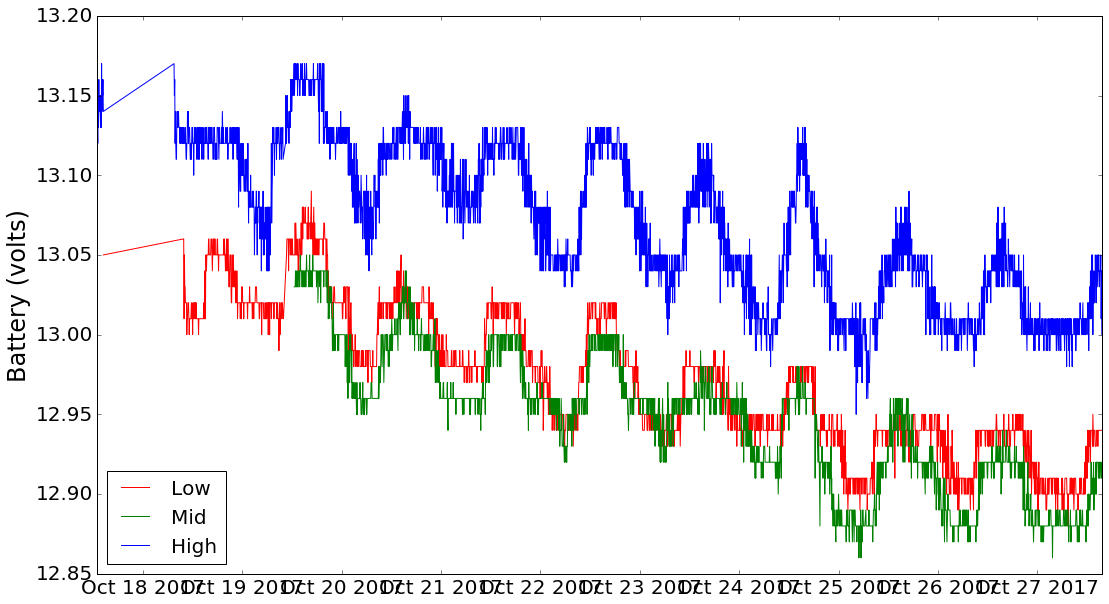

In [14]:
BatteryVoltage = plt.figure(figsize=(18,10))
plt.plot(LowWHCZoneBattery,c='r',label='Low')
plt.plot(MidWHCZoneBattery,c='g',label='Mid')
plt.plot(HighWHCZoneBattery,c='b',label='High')
plt.legend(loc=3,fontsize=20)
plt.tick_params(labelsize=20)
plt.ylabel('Battery (volts)',fontsize = 24)

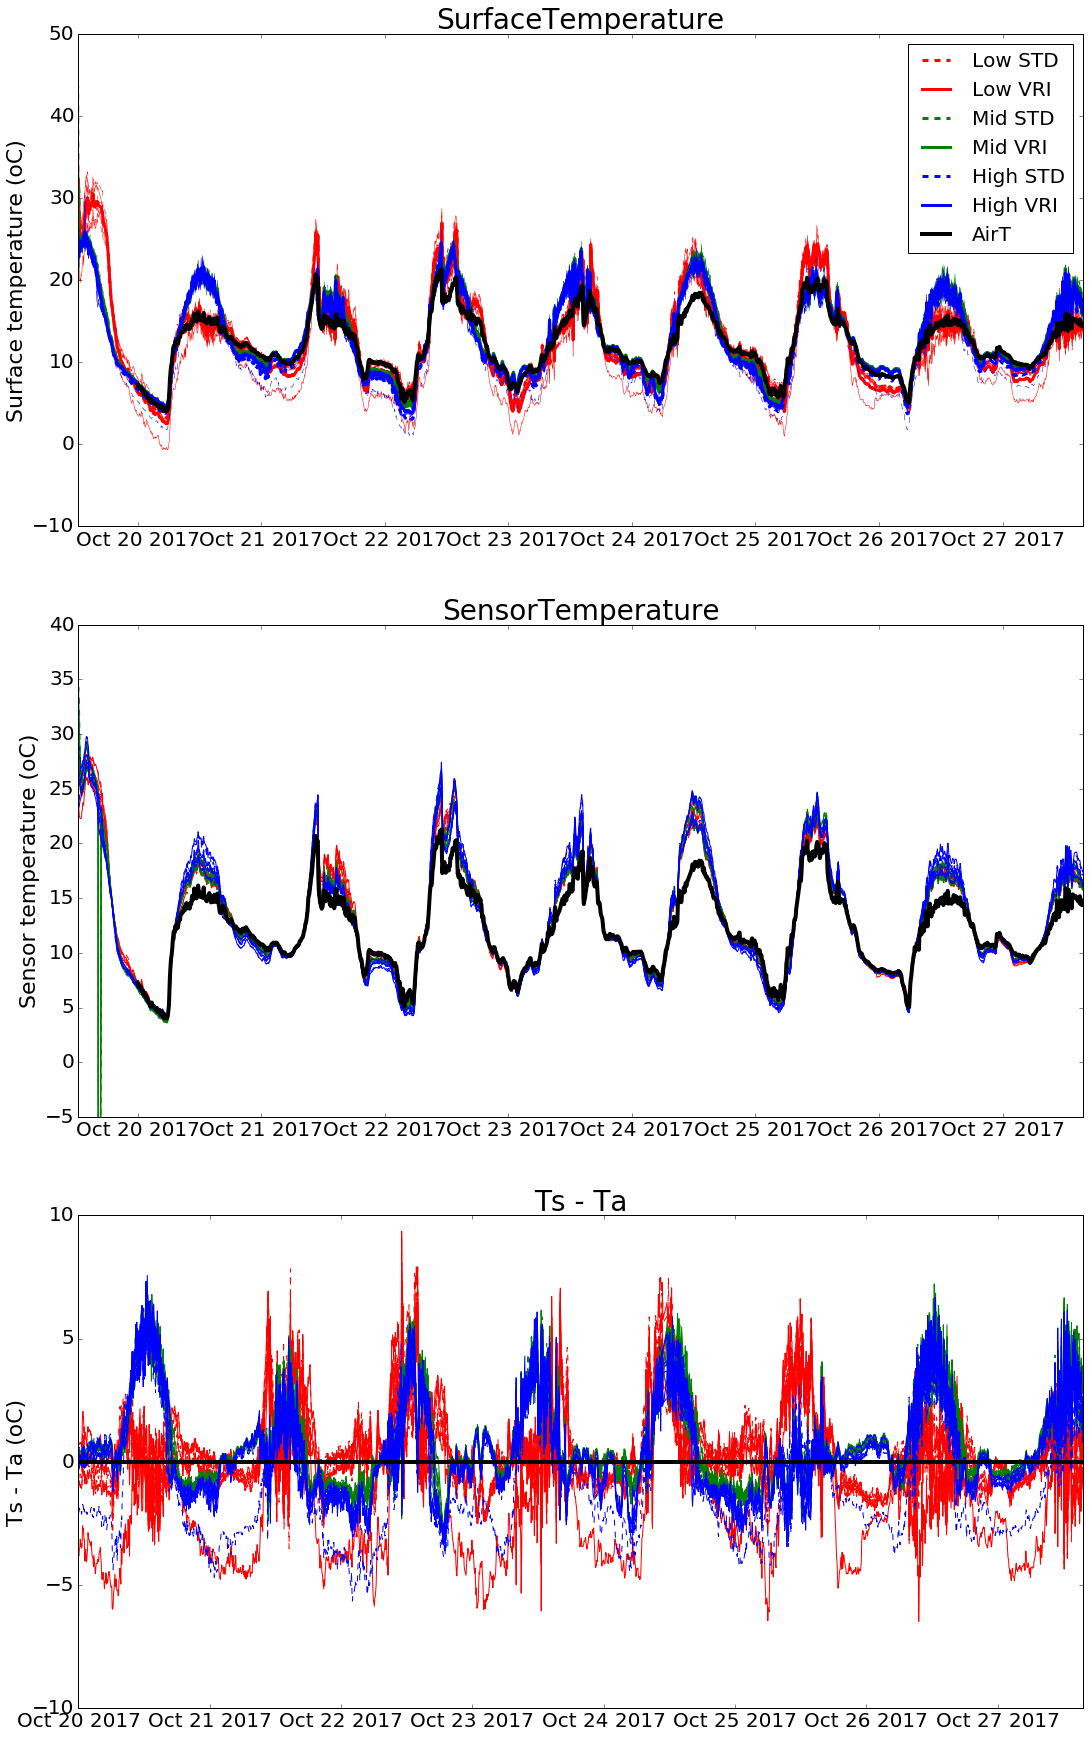

In [15]:
Graph = plt.figure(figsize=(18,30))
pos = 0
Fig = Graph.add_subplot(3,1,1)
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        data = SurfaceTemp.ix[:,(Zone,Irr)]
        plt.plot(data,lines[pos],color = colors[pos],lw=0.5,label = '_nolegend_')
        plt.plot(data.index,data.mean(axis=1),lines[pos],color = colors[pos],lw=3,label = lab)
        pos +=1
plt.plot(MetData.ix[Start:,'AirTemp'],color='k',lw=4,label='AirT')
Fig.legend(fontsize=20)
plt.title('SurfaceTemperature',fontsize=28)
plt.tick_params(labelsize=20)
plt.ylabel('Surface temperature (oC)',fontsize = 22)
Graph.add_subplot(3,1,2)
pos = 0
for Zone in Zones:
    for Irr in Irrigs:
        data = SensorTemp.ix[:,(Zone,Irr)]
        plt.plot(data,lines[pos],color = colors[pos])
        pos +=1
plt.plot(MetData.ix[Start:,'AirTemp'],color='k',lw=4)
plt.ylim(-5,40)
plt.tick_params(labelsize=20)
plt.title('SensorTemperature',fontsize=28)
plt.ylabel('Sensor temperature (oC)',fontsize = 22)

Graph.add_subplot(3,1,3)
pos = 0
for Zone in Zones:
    for Irr in Irrigs:
        data = SurfaceTemp.ix[:,(Zone,Irr)].sub(MetData.ix[Start:,'AirTemp'],axis=0)
        plt.plot(data,lines[pos],color = colors[pos])
        pos +=1
plt.plot([MetData.ix[Start:,'AirTemp'].index.min(),MetData.index.max()],[0,0],color='k',lw=4,label='AirT')
plt.ylim(-10,10)
plt.tick_params(labelsize=20)
plt.title('Ts - Ta',fontsize=28)
plt.ylabel('Ts - Ta (oC)',fontsize = 22)

(0, 10)

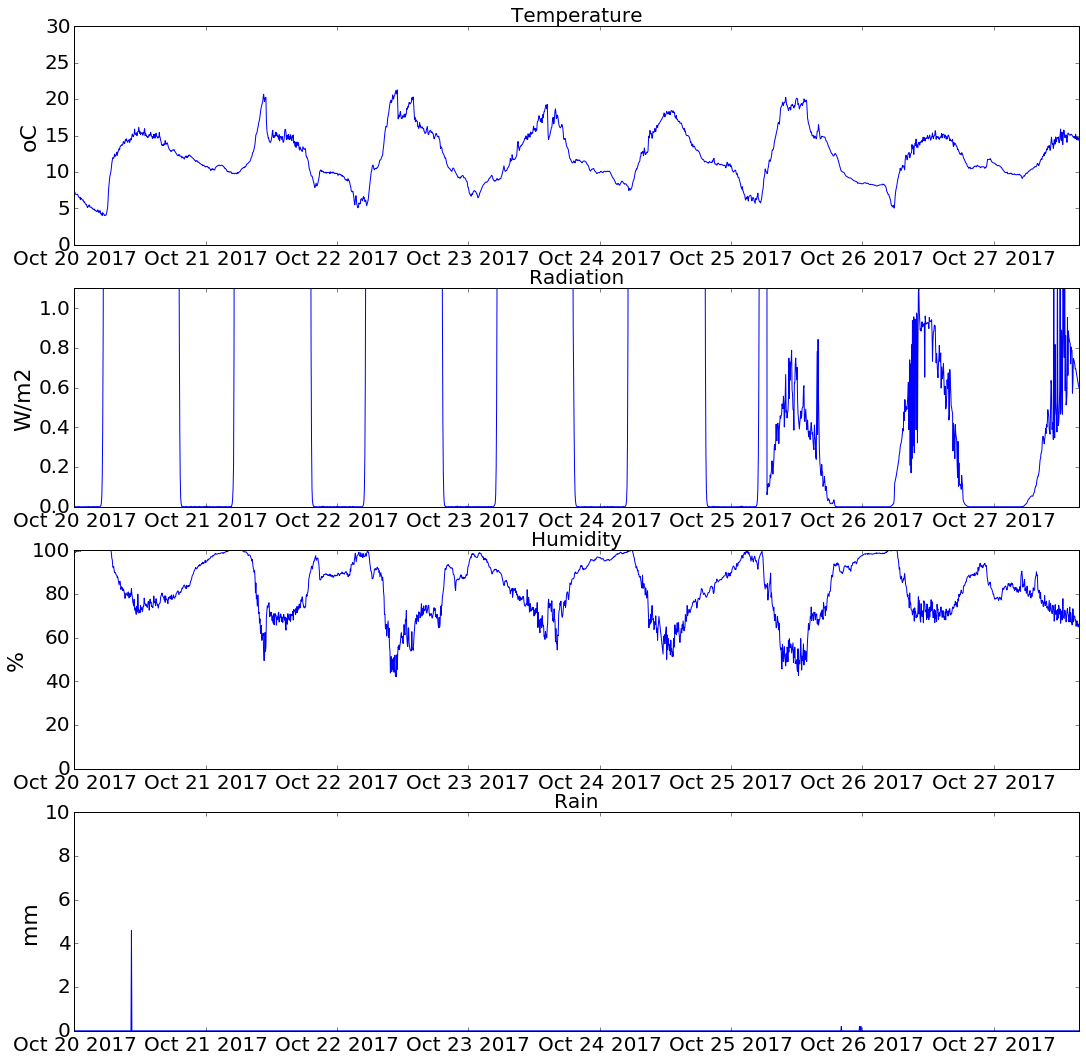

In [16]:
MetGraph = plt.figure(figsize=(18,18))
TempPannel = MetGraph.add_subplot(4,1,1)
plt.plot(MetData.ix[Start:,'AirTemp'])
plt.title('Temperature',fontsize=20)
plt.ylabel('oC',fontsize=22)
plt.tick_params(labelsize=20)
plt.ylim(0,30)
RadnPannel = MetGraph.add_subplot(4,1,2)
plt.plot(MetData.ix[Start:,'RadnkW'])
plt.title('Radiation',fontsize=20)
plt.ylabel('W/m2',fontsize=22)
plt.tick_params(labelsize=20)
plt.ylim(0,1.100)
HumidityPannel = MetGraph.add_subplot(4,1,3)
plt.plot(MetData.ix[Start:,'RelativeHumidity'])
plt.title('Humidity',fontsize=20)
plt.ylabel('%',fontsize=22)
plt.tick_params(labelsize=20)
plt.ylim(0,100)
RainfallPannel = MetGraph.add_subplot(4,1,4)
plt.plot(MetData.ix[Start:,'Rain'])
plt.title('Rain',fontsize=20)
plt.ylabel('mm',fontsize=22)
plt.tick_params(labelsize=20)
plt.ylim(0,10)